<a href="https://colab.research.google.com/github/Walbyq/data-science/blob/main/marketing-campaign/marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [2]:
# Библиотеки для чтения и анализа данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Бибилиотеки для обучения
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

from imblearn.over_sampling import SMOTE # Библиотека для балансировки данных
from imblearn.pipeline import Pipeline # Библиотека для создания пайплайнов

# Установка стиля

In [3]:
# Установка стиля
sns.set_style('darkgrid')

# Настройка палитры
full_palette = sns.color_palette('coolwarm', 9)
cluster_pallete = [full_palette[0], full_palette[-1], "#ffb400", "#9080ff", "#228b22"]
main_palette = [full_palette[0], full_palette[-1]]

# Установка палитры
sns.set_palette(main_palette)

# Подготовка данных

In [4]:
# Подключаемся к Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Получаем датафрейм
csv_file_path = '/content/drive/MyDrive/ML/datasets/marketing_campaign.csv'
df = pd.read_csv(csv_file_path, sep='\t')

**Столбцы датафрейма**

**Люди:**

*   *ID*: Уникальный идентификатор клиента
*   *Year_Birth*: Год рождения клиента
*   *Education*: Уровень образования клиента
*   *Marital_Status*: Семейное положение клиента
*   *Income*: Годовой доход семьи клиента
*   *Kidhome*: Количество детей в семье клиента
*   *Teenhome*: Количество подростков в семье клиента
*   *Dt_Customer*: Дата регистрации клиента в компании
*   *Recency*: Количество дней с момента последней покупки клиента
*   *Complain*: 1, если клиент жаловался в течение последних 2 лет, 0 в остальных случаях

**Продукты:**

*   *MntWines*: Расходы на вино за последние 2 года
*   *MntFruits*: Расходы на фрукты за последние 2 года
*   *MntMeatProducts*: Расходы на мясо за последние 2 года
*   *MntFishProducts*: Расходы на рыбу за последние 2 года
*   *MntSweetProducts*: Расходы на сладости за последние 2 года
*   *MntGoldProds*: Расходы на золото за последние 2 года

**Продвижение:**

*   *NumDealsPurchases*: Количество покупок, совершенных со скидкой
*   *AcceptedCmp1*: 1, если клиент принял предложение в 1-й кампании, 0 в противном случае
*   *AcceptedCmp2*: 1, если клиент принял предложение во 2-й кампании, 0 в противном случае
*   *AcceptedCmp3*: 1, если клиент принял предложение в 3-й кампании, 0 в противном случае
*   *AcceptedCmp4*: 1, если клиент принял предложение в 4-й кампании, 0 в противном случае
*   *AcceptedCmp5*: 1, если клиент принял предложение в 5-й кампании, 0 в противном случае
*   *Response*: 1, если клиент принял предложение в последней кампании, 0 в противном случае

**Место проведения:**

*   *NumWebPurchases*: Количество покупок, совершенных через веб-сайт компании
*   *NumCatalogPurchases*: Количество покупок, совершенных по каталогу
*   *NumStorePurchases*: Количество покупок, совершенных непосредственно в магазинах
*   *NumWebVisitsMonth*: Количество посещений веб-сайта компании за последний месяц

Ссылка на набор данных: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

# Анализ и очистка данных

Получим представление о наборе данных и разведочный анализ. Произведем очистку данных и удалим выбросы:

In [6]:
columns = ['Year_Birth', 'Education', 'Marital_Status', 'Income',
           'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
           'NumDealsPurchases', 'NumWebVisitsMonth', 'Response']

In [7]:
# Выводим размерность
df.shape

(2240, 29)

In [8]:
# Выводим первые 5 значений
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
# Выводим основные статистические характеристики данных по каждому числовому признаку
df.describe().round(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.0,11.0,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,...,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.0,0.0,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.0,11.0,1.00


Удалим неизвестные столбцы *Z_CostContact* и *Z_Revenue*, содержащие одинаковые значения во всех строках:

In [10]:
# Удаляем столбцы
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [11]:
# Выводим основную информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Видим, что в наборе данных присутствует признак 'Dt_Customer' типа 'object'. Для улучшения анализа преобразуем дату регистрации в количество месяцев с момента регистрации:

In [12]:
# Преобразуем строковый признак во временной
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y')

# Вычисляем количество месяцев с момента регистрации
current_date = pd.Timestamp.now()
df['Months_Since_Registration'] = ((current_date - df['Dt_Customer']) / pd.Timedelta(days=30)).astype(int)

In [13]:
# Выводим количество пустых значений
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Столбец *Income*, хранящий информацию о годовом доходе семьи содержит 24 пустые строки. Удалим их:

In [14]:
# Удаляем строки
df = df.dropna()

In [15]:
# Определяем числовые признаки, за исключением столбца 'ID'
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features = [col for col in num_features if not df[col].isin([0, 1]).all() and col != 'ID']

# Определяем бинарные признаки
bin_features = df.columns[(df.isin([0, 1]).all())].tolist()

# Определяем категориальные признаки
cat_features = df.select_dtypes(include=['object']).columns.tolist()

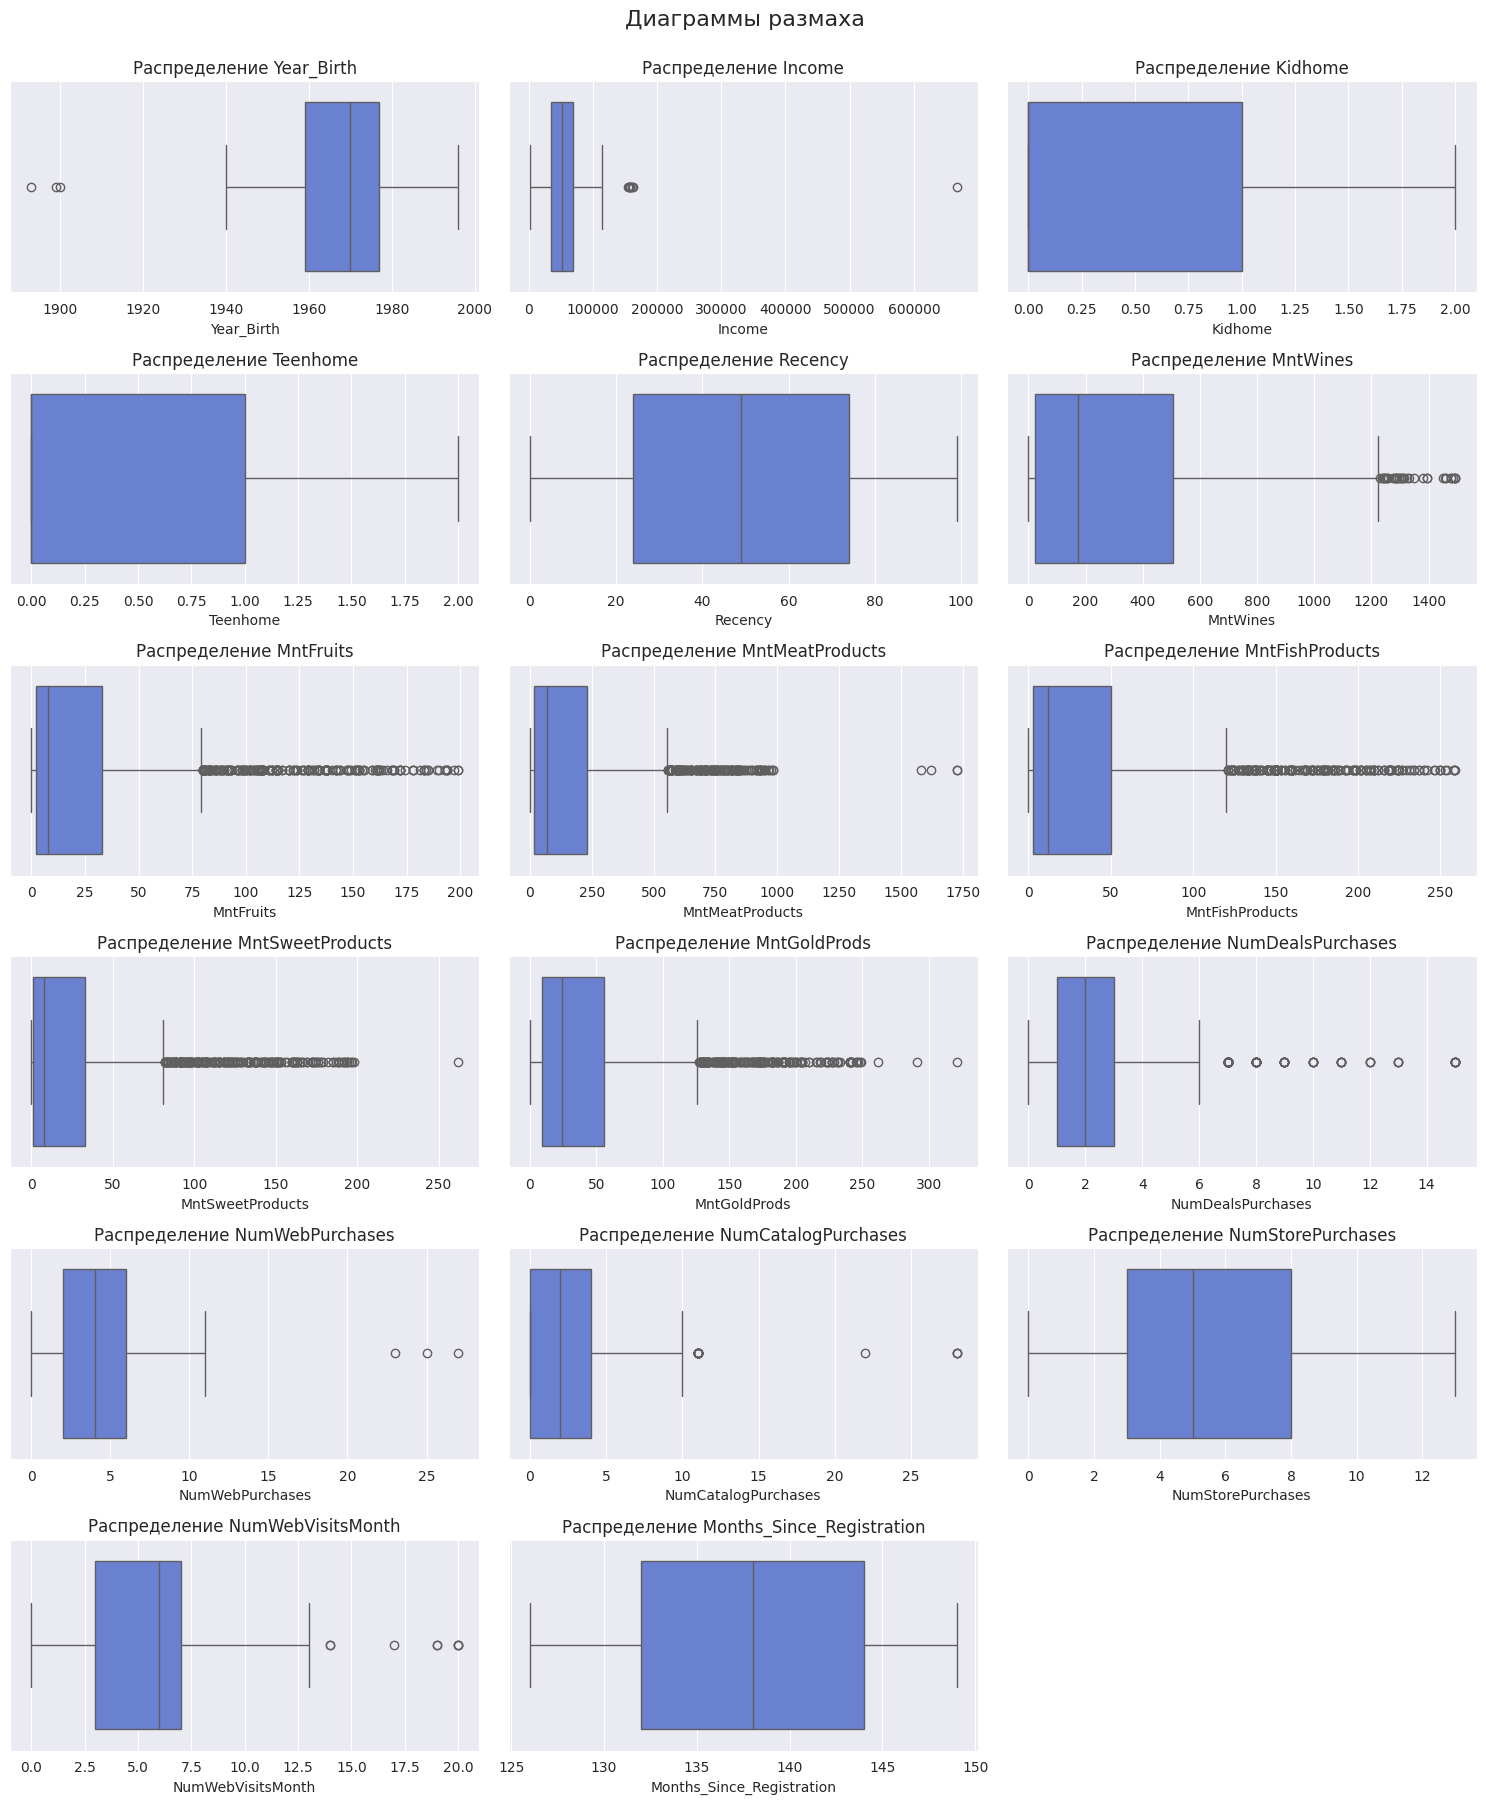

In [16]:
# Настройка графиков
rows = len(num_features) // 3 + 1

plt.figure(figsize=(15, 3 * rows))
plt.suptitle('Диаграммы размаха', fontsize=16, y=1)

# Построение коробчатых диаграмм для каждого числового признака
for i, feature in enumerate(num_features):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Распределение {feature}', fontsize=12)

plt.tight_layout()
plt.show()

По данным диаграммам можно заметить, что в данных присутствуют выбросы, устраним их:

In [17]:
# Устраним выбросы, установив ограничение по возрасту и доходу
df = df[(df['Year_Birth'] > 1910) &
        (df['Income'] < 150000) &
        (df['MntMeatProducts'] < 1500) &
        (df['MntSweetProducts'] < 250) &
        (df['NumWebPurchases'] < 20) &
        (df['NumCatalogPurchases'] < 20)]

print("Общее количество строк после удаления выбросов:", df.shape[0])

Общее количество строк после удаления выбросов: 2201


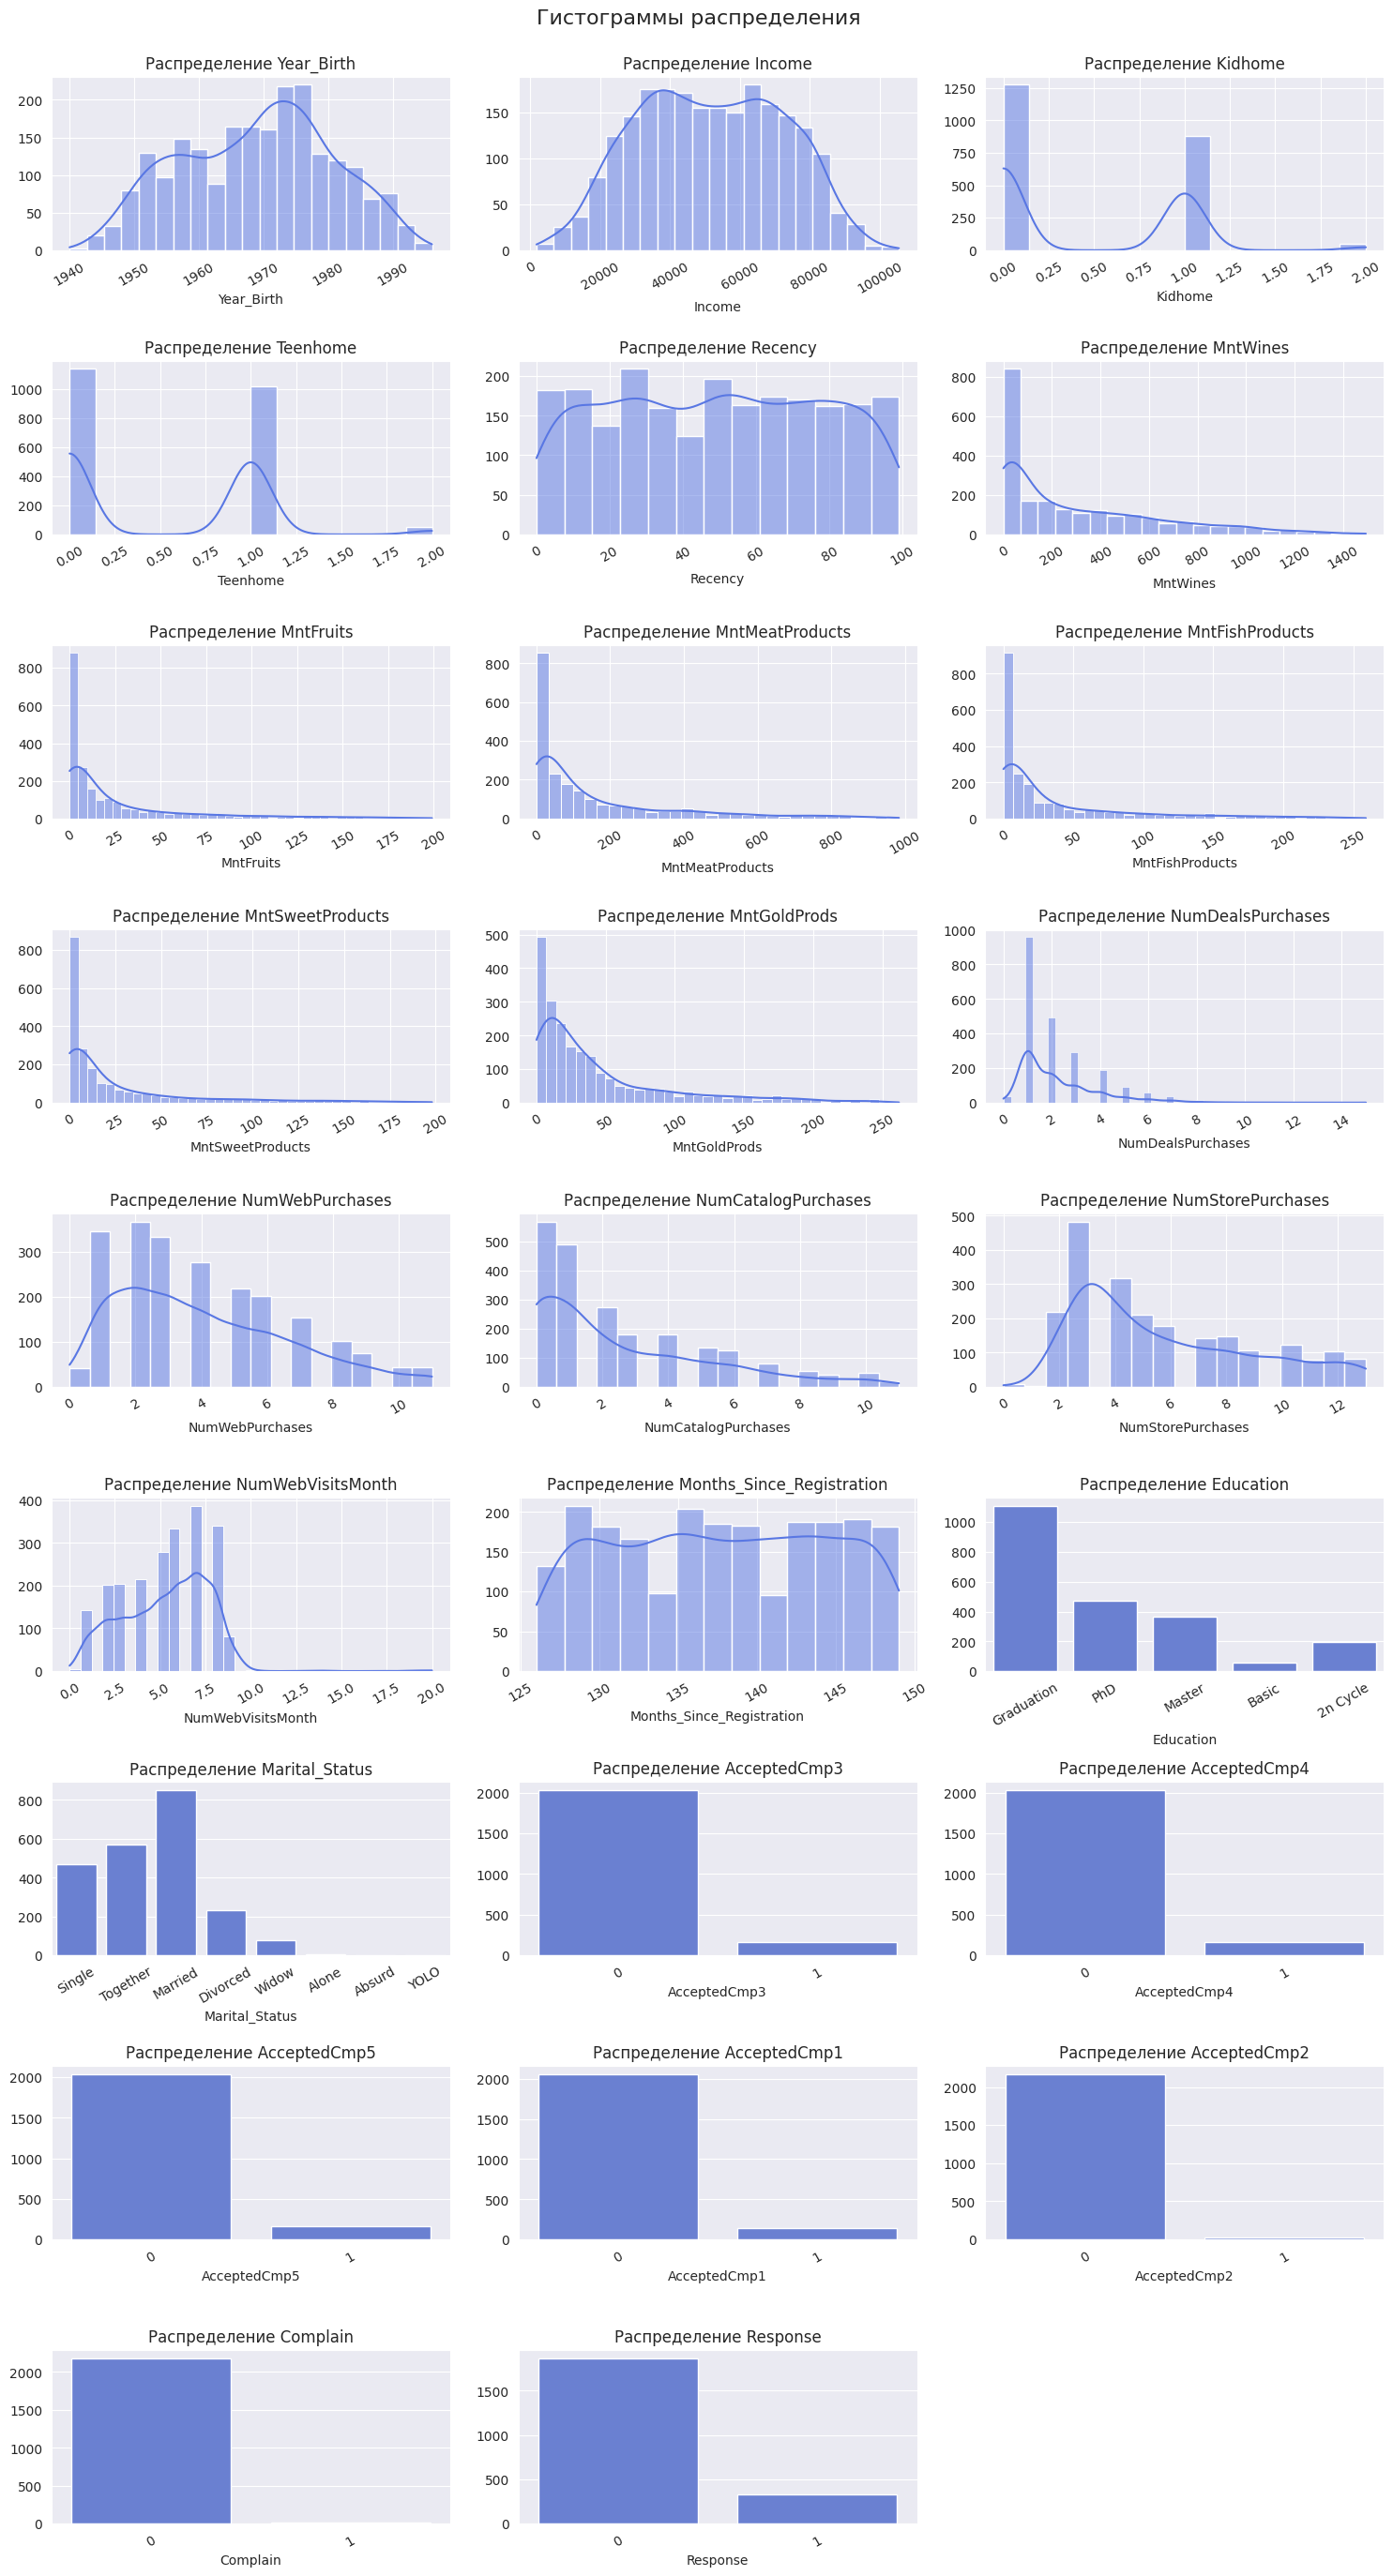

In [18]:
# Настройка графиков для числовых признаков
rows = df.drop('ID', axis=1).shape[1] // 3 + 1 # Все, кроме столбца "ID"
plt.figure(figsize=(15, 3 * rows))
plt.suptitle('Гистограммы распределения', fontsize=16, y=1)

# Построение гистограмм для каждого числового и временного признака
for i, feature in enumerate(num_features):
    plt.subplot(rows, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Распределение {feature}', fontsize=12)
    plt.xticks(rotation=30)
    plt.ylabel(None)

# Построение столбчатых диаграмм для каждого категориального и бинарного признака
for j, feature in enumerate(cat_features + bin_features):
    plt.subplot(rows, 3, len(num_features) + j + 1)
    sns.countplot(df, x=feature)
    plt.title(f'Распределение {feature}', fontsize=12)
    plt.xticks(rotation=30)
    plt.ylabel(None)

plt.tight_layout()
plt.show()

In [19]:
# Объединим бинарные и числовые признаки
num_features += bin_features

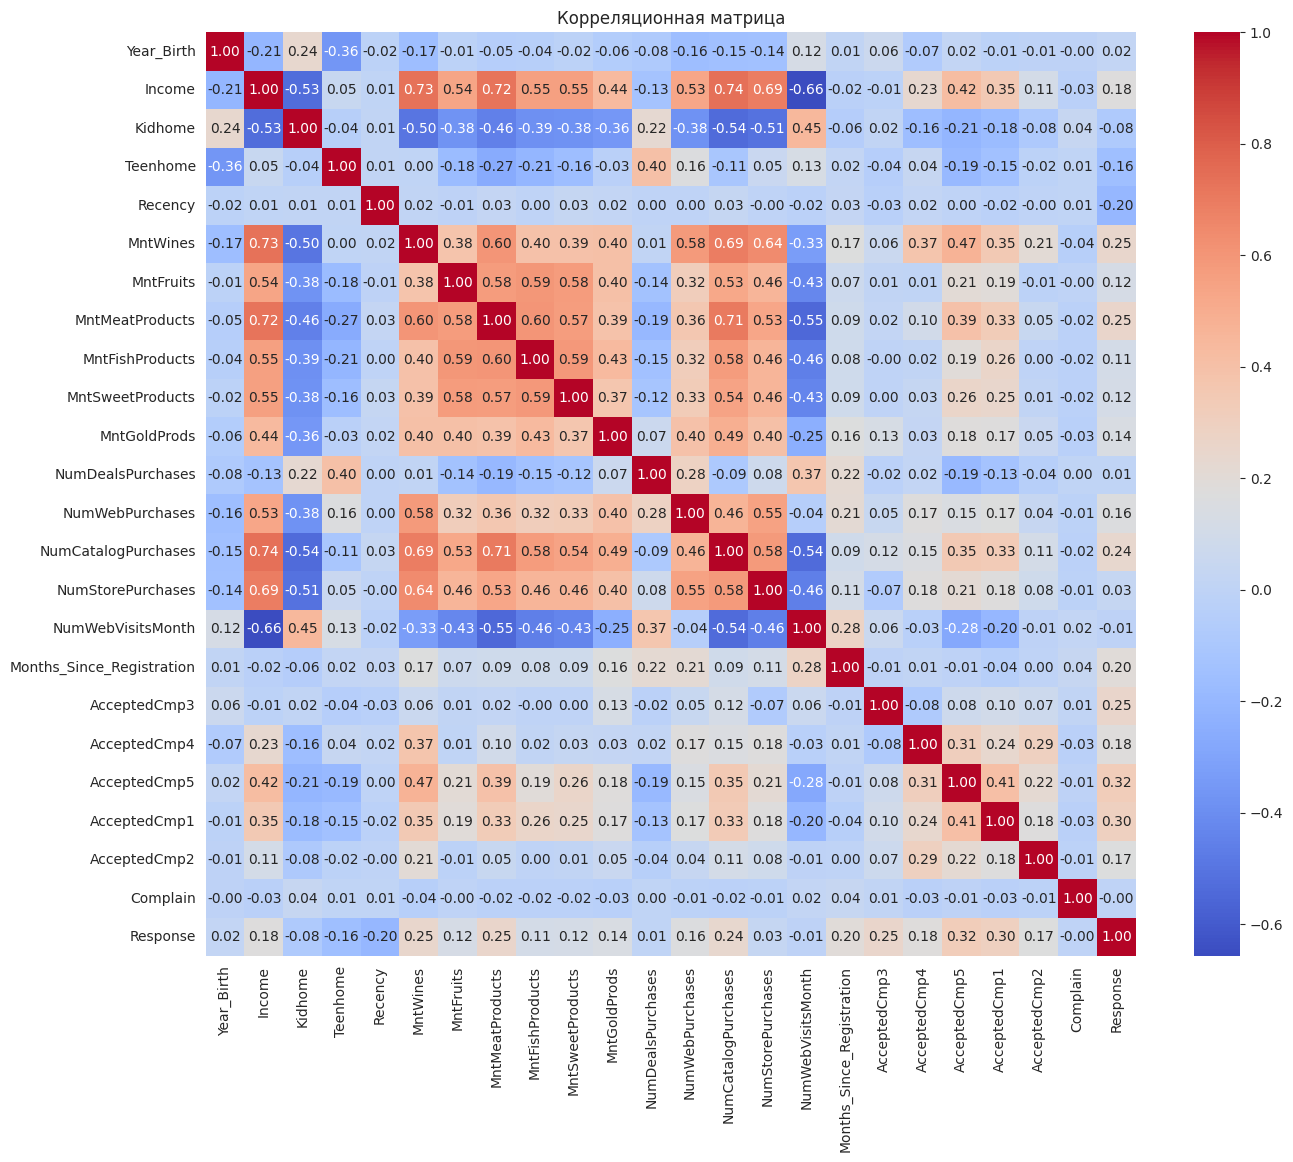

In [20]:
# Матрица корреляции
plt.figure(figsize=(15, 12))
sns.heatmap(df[num_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# Предобработка данных
Произведем one-hot encoding кодировку и скалярную стандартизацию данных:

In [21]:
# Кодируем категориальные данные методом one-hot encoding
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Производим скалярную стандартизацию числовых данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_features])

# Создание и обучение модели
Создадим модель метода k-средних и получим метки кластеров:

In [22]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

Модель метода k-средних — это метод кластерного анализа, который разбивает векторное пространство на заранее определённое число кластеров k.

# Оценка модели
Оценим модель с помощью кластера:

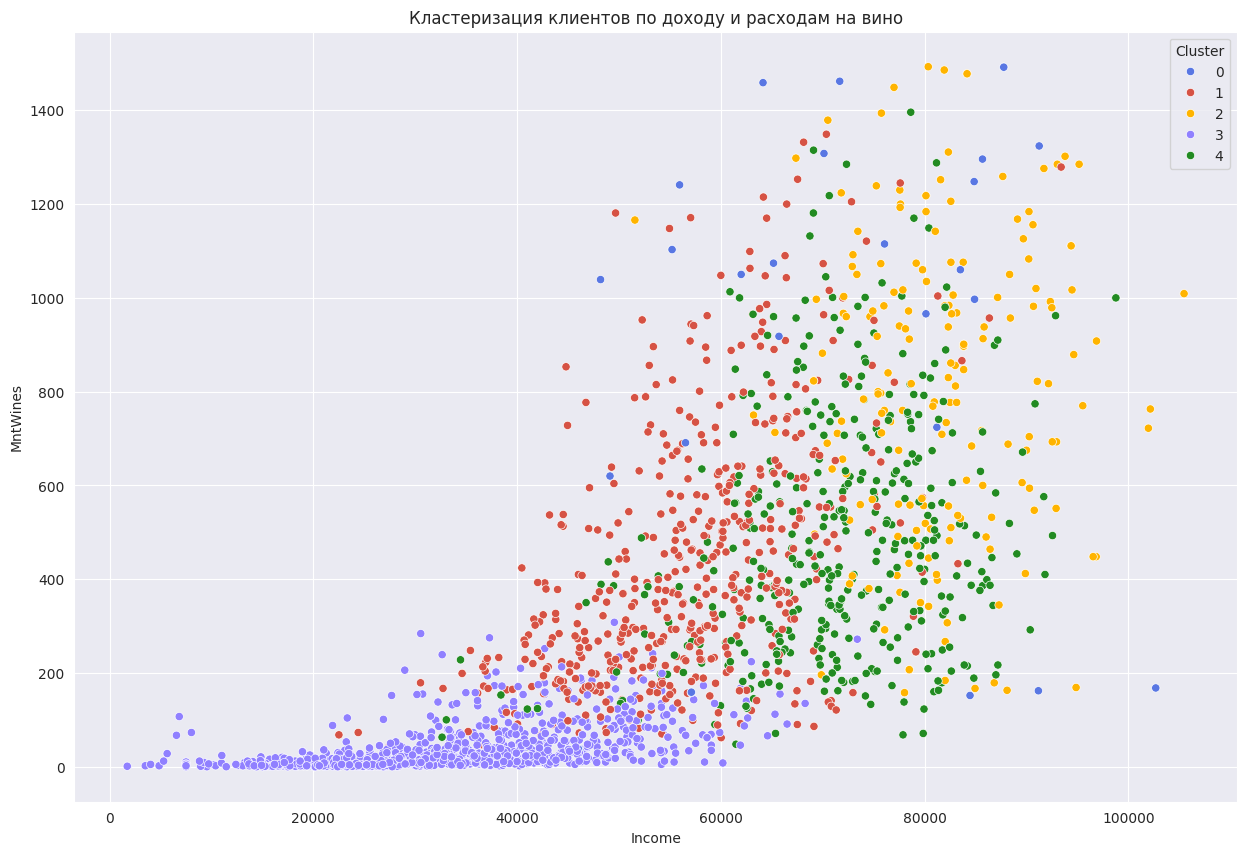

In [24]:
# Визуализация результатов
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='Income', y='MntWines', hue='Cluster', palette=cluster_pallete)
plt.title('Кластеризация клиентов по доходу и расходам на вино')
plt.show()